**<h1>Problem Statement</h1>**

The e-commerce business is quite popular today. Here, you do not need to take orders by going to each customer. A company launches its website to sell the items to the end consumer, and customers can order the products that they require from the same website. Famous examples of such e-commerce companies are Amazon, Flipkart, Myntra, Paytm and Snapdeal.

Suppose you are working as a Machine Learning Engineer in an e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.

With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.

As a senior ML Engineer, you are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings.

In order to do this, you planned to build a sentiment-based product recommendation system

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json 
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
# nlp = en_core_web_sm.load()
nlp = spacy.load('en_core_web_sm',  disable=["parser", "ner"])
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from collections import Counter
import string
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from imblearn.over_sampling import SMOTE
from pandas.io.parsers.readers import TextParser

# Import pickle to save and load the model
import pickle

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

# Importing LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

# Importing Random Forest Classifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# importing libraries for XGBoost classifier
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.metrics.pairwise import pairwise_distances

from pprint import pprint

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# importing dataset
df = pd.read_csv("/content/drive/Othercomputers/My Laptop (2)/Upgrad DS/Capstone/sample30.csv")
df.head(2)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive


#Data Cleaning and Pre-Processing
## Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

<AxesSubplot:xlabel='user_sentiment', ylabel='count'>

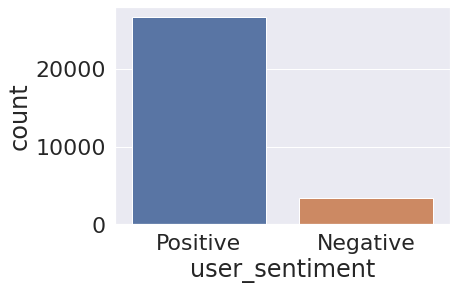

In [ ]:
#Visualize Sentiment
sns.countplot(x='user_sentiment', data= df)

<AxesSubplot:xlabel='reviews_rating', ylabel='count'>

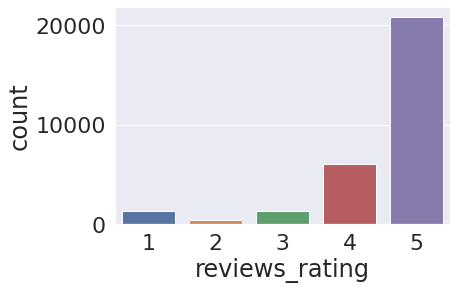

In [ ]:
#Lets see the Rating Distribution
sns.countplot(x='reviews_rating', data= df)

<AxesSubplot:xlabel='reviews_rating', ylabel='count'>

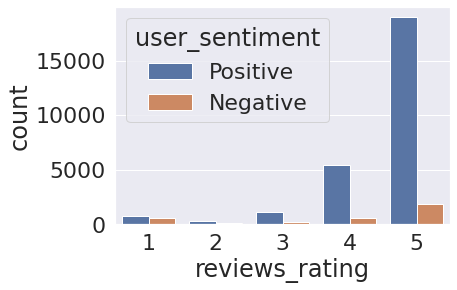

In [ ]:
# Lets see the distribution of ratings w.r.t Sentiment
sns.countplot(data=df, x="reviews_rating", hue="user_sentiment")

<AxesSubplot:xlabel='brand'>

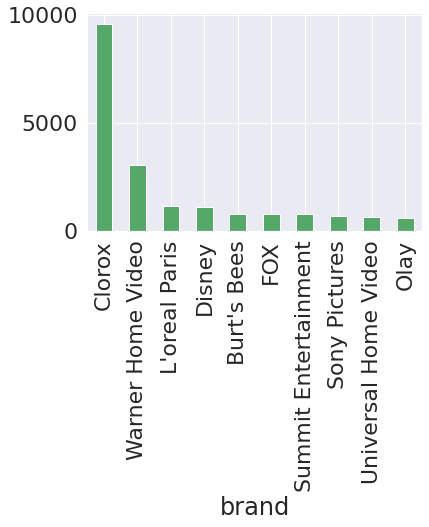

In [ ]:
# Filter the top 10 brands among the positive sentiments
df[df['user_sentiment']=="Positive"].groupby('brand')['brand'].count().sort_values(ascending=False)[:10].plot(kind='bar',color='g')

<AxesSubplot:xlabel='brand'>

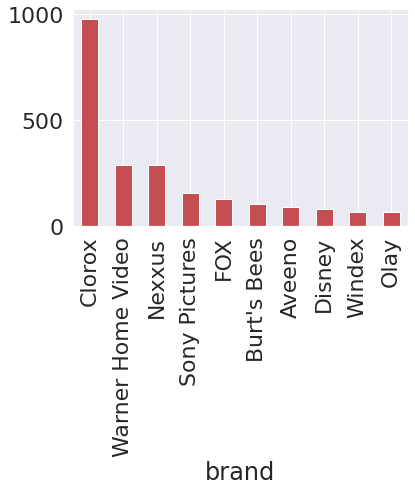

In [ ]:
# Filter the top 10 brands among the negative sentiments
df[df['user_sentiment']=="Negative"].groupby('brand')['brand'].count().sort_values(ascending=False)[:10].plot(kind='bar',color='r')

In [ ]:
pd.crosstab(df["user_sentiment"], df["reviews_rating"], margins=True)


reviews_rating,1,2,3,4,5,All
user_sentiment,,,,,,
Negative,597,140,220,550,1860,3367
Positive,787,280,1125,5470,18970,26632
All,1384,420,1345,6020,20830,29999


#### Lets Clean the data


In [ ]:
# Count of missing values
df.isna().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

In [ ]:
df_clean = df.copy()

In [ ]:
# Remove the missing row of user_sentiment
df_clean = df_clean[~df_clean.user_sentiment.isnull()]

In [ ]:
# Percentage of missing values
df_clean.isna().sum()[df_clean.isna().sum()>0]*100/len(df_clean)

manufacturer             0.470016
reviews_date             0.153338
reviews_didPurchase     46.891563
reviews_doRecommend      8.566952
reviews_title            0.633354
reviews_userCity        93.569786
reviews_userProvince    99.436648
reviews_username         0.210007
dtype: float64

* We can drop reviews_userCity  and reviews_userProvince  as the missing values 
are aroung 95%.
* reviews_didPurchase column has over 46% NULL values. This field is not useful in building either Sentiment/Recommender system as well and will be removed.

In [ ]:
df_clean.drop(columns=['reviews_userProvince','reviews_userCity','reviews_didPurchase'], inplace=True)

In [ ]:
df_clean.isna().sum()[df_clean.isna().sum() > 0]

manufacturer            141
reviews_date             46
reviews_doRecommend    2570
reviews_title           190
reviews_username         63
dtype: int64

In [ ]:
df_clean["reviews_doRecommend"].value_counts()*100/len(df_clean)

True     86.266209
False     5.166839
Name: reviews_doRecommend, dtype: float64

As we see, even after if we fill na or remove na we will be having True 90% of data, so we can drop it.

In [ ]:
df_clean.drop(columns=["reviews_doRecommend"],inplace=True)

* We can drop categories, manufacturer and reviews_date as they are not useful for the analysis.

In [ ]:


df_clean.drop(columns=["reviews_date","categories","manufacturer"],inplace=True)

In [ ]:
df_clean.head()

,id,brand,name,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,i love this album. it's very good. more to the...,Just Awesome,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor. This review was collected as part...,Good,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor.,Good,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,K-Y Love Sensuality Pleasure Gel,1,I read through the reviews on here before look...,Disappointed,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,K-Y Love Sensuality Pleasure Gel,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,Negative


* We can add title to review text as title is just a key word, and we can drop the title
* Here we also fill na na values with space.

In [ ]:
df_clean['reviews'] = df_clean['reviews_text'].fillna("") + " " + df_clean['reviews_title'].fillna("")
df_clean.drop(columns=["reviews_text",'reviews_title'],inplace=True)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29999 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                29999 non-null  object
 1   brand             29999 non-null  object
 2   name              29999 non-null  object
 3   reviews_rating    29999 non-null  int64 
 4   reviews_username  29936 non-null  object
 5   user_sentiment    29999 non-null  object
 6   reviews           29999 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.8+ MB


In [ ]:
df_clean["user_sentiment"] = np.where(df_clean["user_sentiment"]=="Positive",1,0)
df_clean["user_sentiment"].value_counts()

1    26632
0     3367
Name: user_sentiment, dtype: int64

In [ ]:
df_clean.isna().sum()

id                   0
brand                0
name                 0
reviews_rating       0
reviews_username    63
user_sentiment       0
reviews              0
dtype: int64

In [ ]:
df_clean.head()

,id,brand,name,reviews_rating,reviews_username,user_sentiment,reviews
0,AV13O1A8GV-KLJ3akUyj,Universal Music,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua,1,i love this album. it's very good. more to the...
1,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,1,Good flavor. This review was collected as part...
2,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,1,Good flavor. Good
3,AV16khLE-jtxr-f38VFn,K-Y,K-Y Love Sensuality Pleasure Gel,1,rebecca,0,I read through the reviews on here before look...
4,AV16khLE-jtxr-f38VFn,K-Y,K-Y Love Sensuality Pleasure Gel,1,walker557,0,My husband bought this gel for us. The gel cau...


In [ ]:
# Convert all the text columns to string for performing text operations
df_clean['brand'] = df_clean['brand'].astype(str)
df_clean['name'] = df_clean['name'].astype(str)
df_clean['reviews'] = df_clean['reviews'].astype(str)

In [ ]:
# Lets Create Data Frames for Sentimental and Recommendation Separately
sent_df = df_clean[['id', 'reviews', 'user_sentiment']]

ratings_df = df_clean[['id', 'reviews_rating', 'reviews_username']]


In [ ]:
sent_df.head()

,id,reviews,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,i love this album. it's very good. more to the...,1
1,AV14LG0R-jtxr-f38QfS,Good flavor. This review was collected as part...,1
2,AV14LG0R-jtxr-f38QfS,Good flavor. Good,1
3,AV16khLE-jtxr-f38VFn,I read through the reviews on here before look...,0
4,AV16khLE-jtxr-f38VFn,My husband bought this gel for us. The gel cau...,0


In [ ]:
ratings_df.isna().sum()

id                   0
reviews_rating       0
reviews_username    63
dtype: int64

* Since we cant add new users to the data we can delete the rows with missing usernames

In [ ]:
ratings_df.dropna(inplace=True)
ratings_df['reviews_username'] = ratings_df['reviews_username'].astype(str)  # converting to string
ratings_df.head()

,id,reviews_rating,reviews_username
0,AV13O1A8GV-KLJ3akUyj,5,joshua
1,AV14LG0R-jtxr-f38QfS,5,dorothy w
2,AV14LG0R-jtxr-f38QfS,5,dorothy w
3,AV16khLE-jtxr-f38VFn,1,rebecca
4,AV16khLE-jtxr-f38VFn,1,walker557


# Text Processing

In [ ]:
# Function to clean the text and remove all the unnecessary elements.
def punct(text):
    text = text.lower()
    pattern = '[^\w\s]' # Removing punctuation
    text = re.sub(pattern, '', text)
    return text

In [ ]:
sent_df['reviews'] = sent_df['reviews'].apply(punct)

In [ ]:
# Remvoe stop words & words with length 1
stop_words = stopwords.words('english') # get english stop words

def clean(text):
  words = word_tokenize(text)
  res = []
  for word in words:
    if len(word) > 1:
        if word not in stop_words:
          res.append(word)
  return " ".join(res)

In [ ]:
sent_df['reviews'] = sent_df['reviews'].apply(clean)

In [ ]:
# perform stemming & lemmatization
ws_tokenizer = nltk.tokenize.WhitespaceTokenizer()
stemmer = SnowballStemmer(language='english')
lemmatizer = WordNetLemmatizer()

def stemming(text):
  words = word_tokenize(text)
  stem_words = [stemmer.stem(word) for word in words]
  return " ".join(stem_words)

def lemmatize(text):
  words = ws_tokenizer.tokenize(text)
  lemma_words = [lemmatizer.lemmatize(word) for word in words]
  return " ".join(lemma_words)

In [ ]:
sent_df['reviews'] = sent_df['reviews'].apply(lemmatize)
sent_df['reviews'] = sent_df['reviews'].apply(stemming)

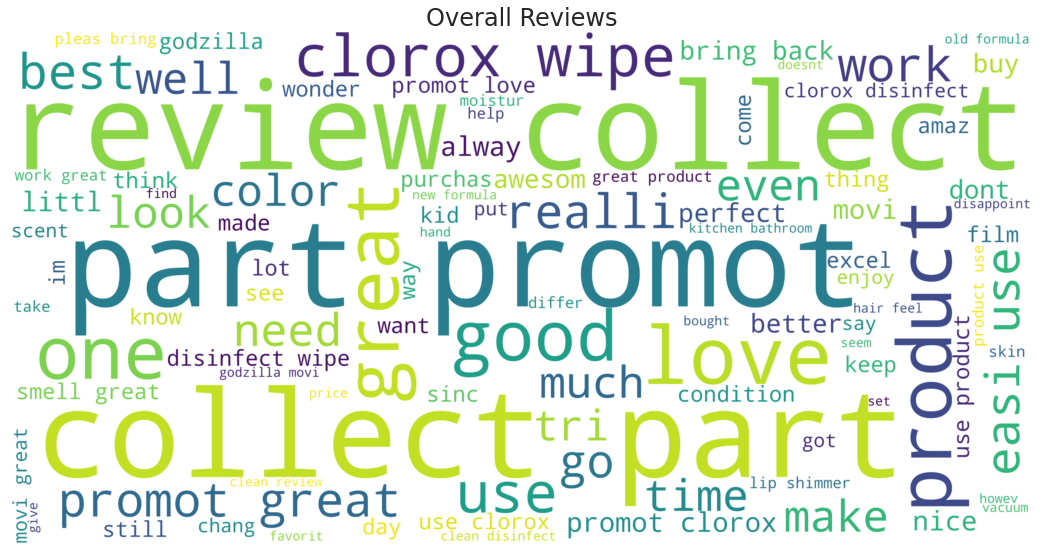

In [ ]:
# World clouds for Total Reviews
sns.set(font_scale=2)
plt.figure(figsize = (15,10))
plt.title('Overall Reviews')
positive_reviews=sent_df[['reviews']]
word_cloud_text = ''.join(positive_reviews['reviews'])
wordcloud = WordCloud(max_font_size=100, # Maximum font size for the largest word
                      max_words=100, # The maximum number of words
                      background_color="white", # Background color for the word cloud image
                      scale = 10, # Scaling between computation and drawing
                      width=800, # Width of the canvas
                      height=400 # Height of the canvas
                     ).generate(word_cloud_text)

plt.imshow(wordcloud, interpolation="bilinear") # to make the displayed image appear more smoothly
plt.axis("off")
plt.tight_layout()


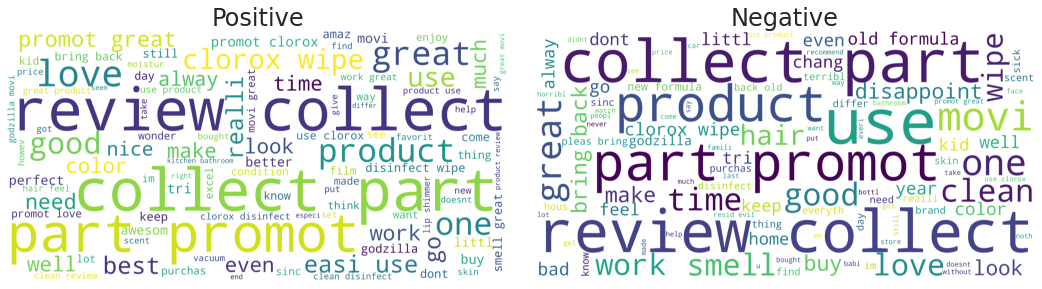

In [ ]:
# Word clouds for postive and negative reviews 

sns.set(font_scale=2)
plt.figure(figsize = (15,10))
plt.subplot(1, 2, 1)
plt.title('Positive')
positive_reviews=sent_df.loc[sent_df.user_sentiment==1,['reviews']]
word_cloud_text = ''.join(positive_reviews['reviews'])
wordcloud = WordCloud(max_font_size=100, # Maximum font size for the largest word
                      max_words=100, # The maximum number of words
                      background_color="white", # Background color for the word cloud image
                      scale = 10, # Scaling between computation and drawing
                      width=800, # Width of the canvas
                      height=400 # Height of the canvas
                     ).generate(word_cloud_text)

plt.imshow(wordcloud, interpolation="bilinear") # to make the displayed image appear more smoothly
plt.axis("off")
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.title('Negative')
positive_reviews=sent_df.loc[sent_df.user_sentiment==0,['reviews']]
word_cloud_text = ''.join(positive_reviews['reviews'])
wordcloud = WordCloud(max_font_size=100, # Maximum font size for the largest word
                      max_words=100, # The maximum number of words
                      background_color="white", # Background color for the word cloud image
                      scale = 10, # Scaling between computation and drawing
                      width=800, # Width of the canvas
                      height=400 # Height of the canvas
                     ).generate(word_cloud_text)

plt.imshow(wordcloud, interpolation="bilinear") # to make the displayed image appear more smoothly
plt.axis("off")
plt.tight_layout()


In [ ]:
def getMostCommonWords(reviews, n_most_common):
    # flatten review column into a list of words, and set each to lowercase
    flattened_reviews = [word for review in reviews for word in review.lower().split()]
    # remove punctuation from reviews
    flattened_reviews = [''.join(char for char in review if char not in string.punctuation) for review in flattened_reviews]
    # remove any empty strings that were created by this process
    flattened_reviews = [review for review in flattened_reviews if review]
    return Counter(flattened_reviews).most_common(n_most_common)

In [ ]:
getMostCommonWords(sent_df[sent_df['user_sentiment']==1]['reviews'],10) # top 10 words in Positive Sentiment

[('great', 14469),
 ('love', 12607),
 ('use', 12107),
 ('product', 11436),
 ('movi', 10064),
 ('review', 8628),
 ('clean', 8572),
 ('collect', 8436),
 ('part', 8359),
 ('promot', 7956)]

In [ ]:
getMostCommonWords(sent_df[sent_df['user_sentiment']==0]['reviews'],10) # top 10 words in Negative Sentiment

[('use', 1577),
 ('product', 1355),
 ('review', 910),
 ('collect', 899),
 ('part', 845),
 ('movi', 836),
 ('promot', 802),
 ('wipe', 722),
 ('like', 718),
 ('love', 574)]

In [ ]:
getMostCommonWords(sent_df['reviews'],10)  # top 10 whole reviews

[('great', 15010),
 ('use', 13684),
 ('love', 13181),
 ('product', 12791),
 ('movi', 10900),
 ('review', 9538),
 ('collect', 9335),
 ('part', 9204),
 ('clean', 8958),
 ('promot', 8758)]

# Feature Extraction
1) Feature Extraction using TF-IDF

In [ ]:
# Initialize the TfidfVectorizer 
tfidf = TfidfVectorizer(min_df=5, max_df=0.95, stop_words='english', ngram_range=(1,2))

In [ ]:
X = tfidf.fit_transform(sent_df['reviews'])
y= sent_df['user_sentiment']

In [ ]:
# Saving the vectorizer so that it can be used later while deploying the model
import pickle
# Save to file in the current working directory
pkl_filename = "/content/drive/Othercomputers/My Laptop (2)/Upgrad DS/Capstone/Tfidf_vectorizer.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(tfidf, file)
# Load from file
with open(pkl_filename, 'rb') as file:
    tfidf = pickle.load(file)

2) Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.25)

In [ ]:
print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes:", X_test.shape, y_test.shape)

Train shapes: (22499, 16926) (22499,)
Test shapes: (7500, 16926) (7500,)


3) Class Imbalance

In [ ]:
y_train.value_counts(normalize=True)*100

1    88.70172
0    11.29828
Name: user_sentiment, dtype: float64

* Lets solve this Imbalance balance using SMOTE Technique

In [ ]:
counter = Counter(y_train)
print("Before handling imbalance", counter)

smote = SMOTE(random_state=2)
X_train_sm, y_train_sm = smote.fit_resample(X_train,y_train)

counter = Counter(y_train_sm)
print("After handling imbalance", counter)

Before handling imbalance Counter({1: 19957, 0: 2542})
After handling imbalance Counter({1: 19957, 0: 19957})


# Model Building


Lets Create The following ML Models for predicting the sentiments based on the text and title of the reviews:
1. Logistic Regression
2. Random Forest
3. XGBoost
4. Naive bayes



In [ ]:

# Function to display scores
def evaluation_scores(classifier, X_test, y_test):

  # Calculating Predicted value
  y_pred = classifier.predict(X_test)

  # Create confusion matrix
  conf_m = confusion_matrix(y_test, y_pred)

  print("Visualizing the Confusion Matrix with a Heatmap")
  print("\n")
  print("*"*50)
  # Visualize Confusion Matrix with heatmap
  fig, ax = plt.subplots(figsize=(6, 6))
  ax = sns.heatmap(conf_m,
                  annot=True,
                  cbar=False,
                  cmap="Blues", fmt = '0.0f')
  plt.xlabel("Actual label")
  plt.ylabel("Predicted label")
  plt.show()
  print("*"*50)
  print("\n")
  accuracy = accuracy_score(y_test, y_pred)
  sensitivity_recall = recall_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  F1_score = f1_score(y_test, y_pred)
  print("Evaluation Score Summary")
  print('-'*50)
  print(f'Accuracy Score: {round(accuracy,2)}')
  print(f'Sensitivity/Recall Score: {round(sensitivity_recall,2)}') 
  print(f'Precision: {round(precision,2)}')
  print(f'F1 Score: {round(F1_score,2)}')
  print('-'*50)
  print(classification_report(y_test, y_pred))
  # Returning evaluation results for comparison later
  evaluation_metrics = [accuracy,sensitivity_recall,precision,F1_score]

  return evaluation_metrics

#### Logistic Regression

In [ ]:
lg = LogisticRegression(random_state=42, solver='liblinear').fit(X_train, y_train)

Visualizing the Confusion Matrix with a Heatmap


**************************************************


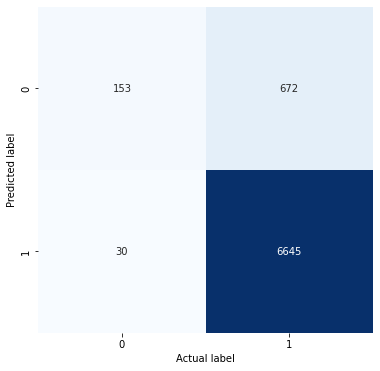

**************************************************


Evaluation Score Summary
--------------------------------------------------
Accuracy Score: 0.91
Sensitivity/Recall Score: 1.0
Precision: 0.91
F1 Score: 0.95
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.19      0.30       825
           1       0.91      1.00      0.95      6675

    accuracy                           0.91      7500
   macro avg       0.87      0.59      0.63      7500
weighted avg       0.90      0.91      0.88      7500



In [ ]:
lg_metrics = evaluation_scores(lg, X_test, y_test)


<b>
1. From above we can observe that Eventhoug the accurcay is very good the F1- Score is Very less.<br>
2. From sensitivity or recall we can observe that the model is predicting everything as 1.<br>
3. These are caused by the Class Imbalance problem<br>

</b>
Lets try with the SMOTE balanced data sets

In [ ]:
lg_sm = LogisticRegression(random_state=42, solver='liblinear').fit(X_train_sm, y_train_sm)

Visualizing the Confusion Matrix with a Heatmap


**************************************************


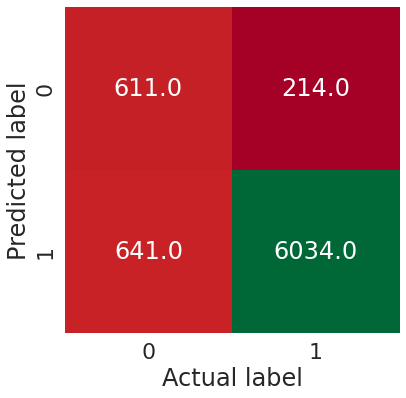

**************************************************


Evaluation Score Summary
--------------------------------------------------
Accuracy Score: 0.89
Sensitivity/Recall Score: 0.9
Precision: 0.97
F1 Score: 0.93
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.49      0.74      0.59       825
           1       0.97      0.90      0.93      6675

    accuracy                           0.89      7500
   macro avg       0.73      0.82      0.76      7500
weighted avg       0.91      0.89      0.90      7500



In [ ]:
lg_metrics = evaluation_scores(lg_sm, X_test, y_test)

* As you can see the Recall score of minority class(Negative) is good in SMote data,  lets deal with SMOTE balanced data from now onwards.

In [ ]:
# Storing the Scores in a variable , so we can compare all modeles later.
metrics = pd.DataFrame({'Metrics': ['Accuracy','Sensitivity/Recall','Precision','F1'], 'LR Base': lg_metrics})
metrics

,Metrics,LR Base
0,Accuracy,0.886000
1,Sensitivity/Recall,0.903970
2,Precision,0.965749
3,F1,0.933839


##### Hyper Parameter Tuning

In [ ]:
lg_grid = {"C": [100, 10, 5, 4, 3, 2, 1, 1.0, 0.1, 0.01],"solver": ["liblinear"]}

In [ ]:
# Setup grid hyperparameter search for LogisticRegression
lg_hp = GridSearchCV(LogisticRegression(random_state=42),
                                param_grid=lg_grid,
                                cv=5,
                                verbose=True,
                                n_jobs=-1,
                                scoring='f1')

# Fit lg hyperparameter search model
lg_hp.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [100, 10, 5, 4, 3, 2, 1, 1.0, 0.1, 0.01],
                         'solver': ['liblinear']},
             scoring='f1', verbose=True)

Visualizing the Confusion Matrix with a Heatmap


**************************************************


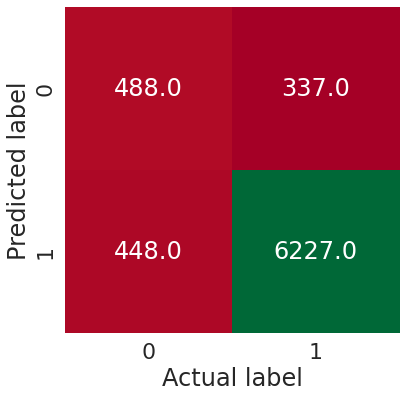

**************************************************


Evaluation Score Summary
--------------------------------------------------
Accuracy Score: 0.9
Sensitivity/Recall Score: 0.93
Precision: 0.95
F1 Score: 0.94
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.52      0.59      0.55       825
           1       0.95      0.93      0.94      6675

    accuracy                           0.90      7500
   macro avg       0.74      0.76      0.75      7500
weighted avg       0.90      0.90      0.90      7500



In [ ]:
# Getting the scores of the tuned model
lg_hp_metrics = evaluation_scores(lg_hp, X_test, y_test)

In [ ]:
metrics["LR_hyp_Model"] = lg_hp_metrics
metrics

,Metrics,LR Base,LR_hyp_Model
0,Accuracy,0.886000,0.895333
1,Sensitivity/Recall,0.903970,0.932884
2,Precision,0.965749,0.948659
3,F1,0.933839,0.940705


* As we can see the Tuned Model is Performing Better


## Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(random_state=42).fit(X_train_sm, y_train_sm)

Visualizing the Confusion Matrix with a Heatmap


**************************************************


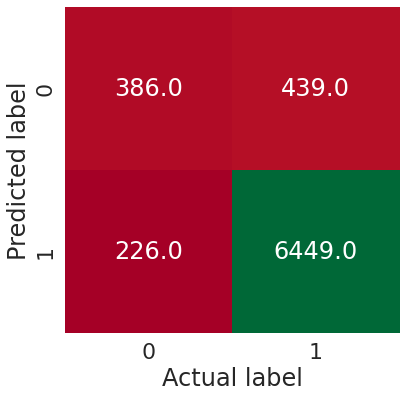

**************************************************


Evaluation Score Summary
--------------------------------------------------
Accuracy Score: 0.91
Sensitivity/Recall Score: 0.97
Precision: 0.94
F1 Score: 0.95
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.63      0.47      0.54       825
           1       0.94      0.97      0.95      6675

    accuracy                           0.91      7500
   macro avg       0.78      0.72      0.74      7500
weighted avg       0.90      0.91      0.91      7500



In [ ]:
# Getting the score of the base model
rf_metrics = evaluation_scores(rf, X_test, y_test)

In [ ]:
metrics["RF_base"] = rf_metrics
metrics

,Metrics,LR Base,LR_hyp_Model,RF_base
0,Accuracy,0.886000,0.895333,0.911333
1,Sensitivity/Recall,0.903970,0.932884,0.966142
2,Precision,0.965749,0.948659,0.936266
3,F1,0.933839,0.940705,0.950970


#### Hyper Parameter Tuning

In [ ]:
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": np.arange(10, 50, 5),
           "min_samples_split": np.arange(15, 500, 15),
           "min_samples_leaf": np.arange(5, 50, 5)}

In [ ]:
# Setup random hyperparameter search for Random Forest Classifier
rf_hp = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                param_distributions=rf_grid,
                                cv=5,
                                verbose=True,
                                n_jobs=-1,
                                scoring='f1')

# Fit random hyperparameter search model
rf_hp.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': array([10, 15, 20, 25, 30, 35, 40, 45]),
                                        'min_samples_leaf': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45]),
                                        'min_samples_split': array([ 15,  30,  45,  60,  75,  90, 105, 120, 135, 150, 165, 180, 195,
       210, 225, 240, 255, 270, 285, 300, 315, 330, 345, 360, 375, 390,
       405, 420, 435, 450, 465, 480, 495]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   scoring='f1', verbose=True)

In [ ]:
# Check best parameters
rf_hp.best_params_

{'n_estimators': 210,
 'min_samples_split': 405,
 'min_samples_leaf': 15,
 'max_depth': 30}

Visualizing the Confusion Matrix with a Heatmap


**************************************************


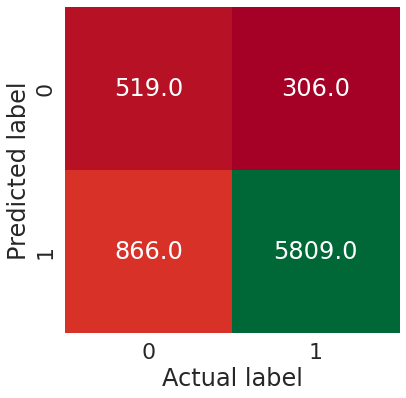

**************************************************


Evaluation Score Summary
--------------------------------------------------
Accuracy Score: 0.84
Sensitivity/Recall Score: 0.87
Precision: 0.95
F1 Score: 0.91
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.37      0.63      0.47       825
           1       0.95      0.87      0.91      6675

    accuracy                           0.84      7500
   macro avg       0.66      0.75      0.69      7500
weighted avg       0.89      0.84      0.86      7500



In [ ]:
rf_hp_metrics  =  evaluation_scores(rf_hp, X_test, y_test)

* As we can see the Base Model is Performing Better 

In [ ]:
metrics["RF_HYP"] = rf_hp_metrics
metrics

,Metrics,LR Base,LR_hyp_Model,RF_base,RF_HYP
0,Accuracy,0.886000,0.895333,0.911333,0.843733
1,Sensitivity/Recall,0.903970,0.932884,0.966142,0.870262
2,Precision,0.965749,0.948659,0.936266,0.949959
3,F1,0.933839,0.940705,0.950970,0.908366


## XGB Classifier

In [ ]:
xg = xgb.XGBClassifier(random_state=42).fit(X_train_sm, y_train_sm)

Visualizing the Confusion Matrix with a Heatmap


**************************************************


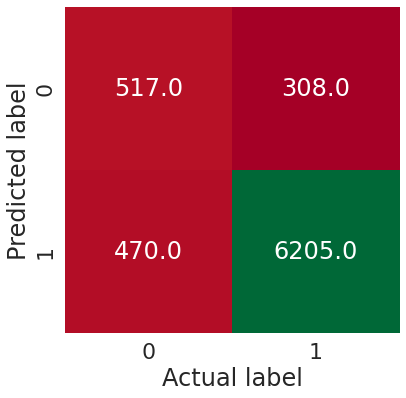

**************************************************


Evaluation Score Summary
--------------------------------------------------
Accuracy Score: 0.9
Sensitivity/Recall Score: 0.93
Precision: 0.95
F1 Score: 0.94
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.52      0.63      0.57       825
           1       0.95      0.93      0.94      6675

    accuracy                           0.90      7500
   macro avg       0.74      0.78      0.76      7500
weighted avg       0.91      0.90      0.90      7500



In [ ]:
# Getting the score of the base model
xg_metrics = evaluation_scores(xg, X_test, y_test)

In [ ]:
metrics["XGB_base"] = xg_metrics
metrics

,Metrics,LR Base,LR_hyp_Model,RF_base,RF_HYP,XGB_base
0,Accuracy,0.886000,0.895333,0.911333,0.843733,0.896267
1,Sensitivity/Recall,0.903970,0.932884,0.966142,0.870262,0.929588
2,Precision,0.965749,0.948659,0.936266,0.949959,0.952710
3,F1,0.933839,0.940705,0.950970,0.908366,0.941007


### Hyper Parameter Tuning

In [ ]:
xg_grid = {"learning_rate": np.arange(0.05, 1, 0.05),
           "max_depth": np.arange(5, 20, 5)
           }

In [ ]:
# Setup random hyperparameter search for Random Forest Classifier
xg_hp = RandomizedSearchCV(XGBClassifier(random_state=42),
                                param_distributions=xg_grid,
                                cv=4,
                                verbose=True,
                                n_jobs=-1,
                                scoring='f1')

# Fit random hyperparameter search model
xg_hp.fit(X_train_sm, y_train_sm)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=42, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                                        'max_depth': array([ 5, 10, 15])},
                   scoring='f1', verbose=True)

In [ ]:
# Check best parameters
xg_hp.best_params_

{'max_depth': 15, 'learning_rate': 0.7000000000000001}

Visualizing the Confusion Matrix with a Heatmap


**************************************************


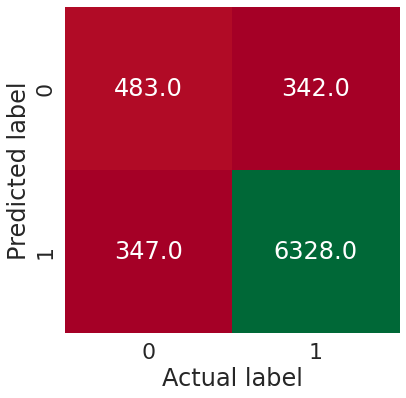

**************************************************


Evaluation Score Summary
--------------------------------------------------
Accuracy Score: 0.91
Sensitivity/Recall Score: 0.95
Precision: 0.95
F1 Score: 0.95
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.58      0.59      0.58       825
           1       0.95      0.95      0.95      6675

    accuracy                           0.91      7500
   macro avg       0.77      0.77      0.77      7500
weighted avg       0.91      0.91      0.91      7500



In [ ]:
# Getting the score
xg_hp_metrics = evaluation_scores(xg_hp, X_test, y_test)

In [ ]:
metrics["XGB_HYP"] = xg_hp_metrics
metrics

,Metrics,LR Base,LR_hyp_Model,RF_base,RF_HYP,XGB_base,XGB_HYP
0,Accuracy,0.886000,0.895333,0.911333,0.843733,0.896267,0.908133
1,Sensitivity/Recall,0.903970,0.932884,0.966142,0.870262,0.929588,0.948015
2,Precision,0.965749,0.948659,0.936266,0.949959,0.952710,0.948726
3,F1,0.933839,0.940705,0.950970,0.908366,0.941007,0.948370


## Naive bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB().fit(X_train_sm, y_train_sm)


Visualizing the Confusion Matrix with a Heatmap


**************************************************


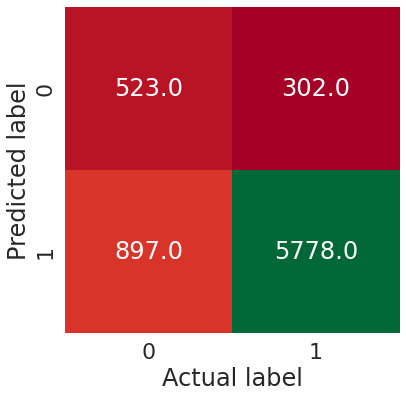

**************************************************


Evaluation Score Summary
--------------------------------------------------
Accuracy Score: 0.84
Sensitivity/Recall Score: 0.87
Precision: 0.95
F1 Score: 0.91
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.37      0.63      0.47       825
           1       0.95      0.87      0.91      6675

    accuracy                           0.84      7500
   macro avg       0.66      0.75      0.69      7500
weighted avg       0.89      0.84      0.86      7500



In [ ]:
# Getting the score of the base model
nb_metrics = evaluation_scores(nb, X_test, y_test)

In [ ]:
metrics["NB_base"] = nb_metrics
metrics

,Metrics,LR Base,LR_hyp_Model,RF_base,RF_HYP,XGB_base,XGB_HYP,NB_base
0,Accuracy,0.886000,0.895333,0.911333,0.843733,0.896267,0.908133,0.840133
1,Sensitivity/Recall,0.903970,0.932884,0.966142,0.870262,0.929588,0.948015,0.865618
2,Precision,0.965749,0.948659,0.936266,0.949959,0.952710,0.948726,0.950329
3,F1,0.933839,0.940705,0.950970,0.908366,0.941007,0.948370,0.905998


### Hyper Parameter Tuning

In [ ]:
nb_grid ={'alpha': [0.01,0.02,0.03,0.001,0.0001,0.00001,0.000001,0.1,1,0.000000000000001,0],
          'fit_prior': [True, False],
          'force_alpha': [True, False]
         }

In [ ]:

# Setup random hyperparameter search for Random Forest Classifier
nb_hp = RandomizedSearchCV(MultinomialNB(),
                                param_distributions=nb_grid,
                                cv=4,
                                verbose=True,
                                n_jobs=-1,
                                scoring='f1')

# Fit random hyperparameter search model
nb_hp.fit(X_train_sm, y_train_sm)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


/usr/local/lib/python3.8/dist-packages/sklearn/naive_bayes.py:635: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.



RandomizedSearchCV(cv=4, estimator=MultinomialNB(), n_jobs=-1,
                   param_distributions={'alpha': [0.01, 0.02, 0.03, 0.001,
                                                  0.0001, 1e-05, 1e-06, 0.1, 1,
                                                  1e-15, 0],
                                        'fit_prior': [True, False],
                                        'force_alpha': [True, False]},
                   scoring='f1', verbose=True)

In [ ]:

# Check best parameters
nb_hp.best_params_

{'force_alpha': False, 'fit_prior': True, 'alpha': 1e-15}

Visualizing the Confusion Matrix with a Heatmap


**************************************************


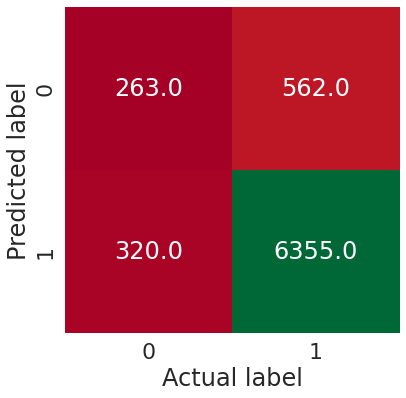

**************************************************


Evaluation Score Summary
--------------------------------------------------
Accuracy Score: 0.88
Sensitivity/Recall Score: 0.95
Precision: 0.92
F1 Score: 0.94
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.45      0.32      0.37       825
           1       0.92      0.95      0.94      6675

    accuracy                           0.88      7500
   macro avg       0.68      0.64      0.65      7500
weighted avg       0.87      0.88      0.87      7500



In [ ]:
# Getting the score
nb_hp_metrics = evaluation_scores(nb_hp, X_test, y_test)

In [ ]:


metrics["NB_HYP"] = nb_hp_metrics
metrics

,Metrics,LR Base,LR_hyp_Model,RF_base,RF_HYP,XGB_base,XGB_HYP,NB_base,NB_HYP
0,Accuracy,0.886000,0.895333,0.911333,0.843733,0.896267,0.908133,0.840133,0.882400
1,Sensitivity/Recall,0.903970,0.932884,0.966142,0.870262,0.929588,0.948015,0.865618,0.952060
2,Precision,0.965749,0.948659,0.936266,0.949959,0.952710,0.948726,0.950329,0.918751
3,F1,0.933839,0.940705,0.950970,0.908366,0.941007,0.948370,0.905998,0.935109


In [ ]:
# saving the model
path = "/content/drive/Othercomputers/My Laptop (2)/Upgrad DS/Capstone/"
def save_object(obj, filename):
    filename =path+filename+'.pkl'
    pickle.dump(obj, open(filename, 'wb'))

In [ ]:
save_object(rf, 'Finalized_Model')

# Building the Recommendation System

Lets build two types of recommender system's and select the one that is best suited in this case.
1. User-based recommendation system
2. Item-based recommendation system

In [ ]:
ratings_df.head()

,id,reviews_rating,reviews_username
0,AV13O1A8GV-KLJ3akUyj,5,joshua
1,AV14LG0R-jtxr-f38QfS,5,dorothy w
2,AV14LG0R-jtxr-f38QfS,5,dorothy w
3,AV16khLE-jtxr-f38VFn,1,rebecca
4,AV16khLE-jtxr-f38VFn,1,walker557


In [ ]:
#splitting the train and test
train, test = train_test_split(ratings_df, test_size=0.25, random_state=42)

In [ ]:
print(train.shape)
print(test.shape)

(22452, 3)
(7484, 3)


In [ ]:
# Pivot the train ratings' dataset into matrix format in which columns are products and the rows are user IDs.
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).fillna(0)
print(df_pivot.shape)
df_pivot.head(5)

(19427, 260)


id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Creating dummy train & dummy test dataset
* Dummy train will be used later for prediction of the movies which has not been rated by the user. To ignore the movies rated by the user, we will mark it as 0 during prediction. The movies not rated by user is marked as 1 for prediction in dummy train dataset.
* Dummy test will be used for evaluation. To evaluate, we will only make prediction on the movies rated by the user. So, this is marked as 1. This is just opposite of dummy_train.

In [ ]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

In [ ]:
# The products not rated by user is marked as 1 for prediction. 
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [ ]:
# Convert the dummy train dataset into matrix format
dummy_train = dummy_train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).fillna(1)

dummy_train.head(5)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0325home,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


* Lets use Adjusted Cosine Similarity as our similarity Index

In [ ]:
# Pivot the train ratings' dataset into matrix format in which columns are Products and the rows are usernames.
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
)

In [ ]:
# Normalising the rating of the product for each user around 0 mean
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [ ]:
df_subtracted.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0325home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# Prediction - User User
user_correlation[user_correlation<0]=0 # making negative values as 0 
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings# Rating predicted by the user is the weighted sum of correlation with the product rating.

array([[0.        , 0.        , 2.5       , ..., 1.46399891, 0.        ,
        0.20412415],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
# Since we are interested only in the products not rated by the user, we will ignore the products rated by the user by making it zero.
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,2.5,3.697789,0.0,0.0,0.0,0.269582,2.581989,0.944911,...,1.666667,0.188982,0.0,0.0,0.0,0.0,0.0,1.463999,0.0,0.204124
01impala,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
02dakota,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
02deuce,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
0325home,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000


### Recommend the top 20 products for the random username.

In [ ]:
# Take a sample username as input.
user_input = '00sab00'

In [ ]:
top20_recommendations = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
df_top20_recommendations = pd.DataFrame({'Product Id': top20_recommendations.index, 'cosine_similarity_score' : top20_recommendations})
df_top20_recommendations.reset_index(drop=True, inplace=True)
df_top20_recommendations

,Product Id,cosine_similarity_score
0,AVpfPaoqLJeJML435Xk9,41.909571
1,AVpfRTh1ilAPnD_xYic2,33.115385
2,AVpf0eb2LJeJML43EVSt,14.319357
3,AVpf2tw1ilAPnD_xjflC,13.721466
4,AVpf3VOfilAPnD_xjpun,12.914090
5,AVpfBrUZilAPnD_xTUly,9.963670
6,AVpf385g1cnluZ0-s0_t,6.984337
7,AVpfJP1C1cnluZ0-e3Xy,6.405130
8,AVpfM_ytilAPnD_xXIJb,6.238598
9,AVpfR5m0LJeJML436K3W,5.649447


In [ ]:
top20 = pd.merge(df, df_top20_recommendations,left_on='id',right_on='Product Id', how = 'inner')[['Product Id', 'name', 'cosine_similarity_score']].drop_duplicates()
top20.reset_index(drop=True, inplace=True)
top20.sort_values(by='cosine_similarity_score', ascending=False)

,Product Id,name,cosine_similarity_score
16,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,41.909571
19,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digita...,33.115385
2,AVpf0eb2LJeJML43EVSt,The Resident Evil Collection 5 Discs (blu-Ray),14.319357
4,AVpf2tw1ilAPnD_xjflC,Red (special Edition) (dvdvideo),13.721466
6,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,12.914090
9,AVpfBrUZilAPnD_xTUly,"Coty Airspun Face Powder, Translucent Extra Co...",9.963670
5,AVpf385g1cnluZ0-s0_t,"Hormel Chili, No Beans",6.984337
10,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,6.405130
11,AVpfM_ytilAPnD_xXIJb,Tostitos Bite Size Tortilla Chips,6.238598
18,AVpfR5m0LJeJML436K3W,Jason Aldean - They Don't Know,5.649447


### Evaluation

In [ ]:
# Find out the common users of test and train dataset that are present in test.
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(1795, 3)

In [ ]:
# convert into the user-product matrix.
common_user_based_matrix = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating')

In [ ]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)

In [ ]:

user_correlation_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,19417,19418,19419,19420,19421,19422,19423,19424,19425,19426
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
user_correlation_df['reviews_username'] = df_pivot.index

user_correlation_df.set_index('reviews_username',inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,19417,19418,19419,19420,19421,19422,19423,19424,19425,19426
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
list_name = common.reviews_username.tolist()
user_correlation_df.columns = df_pivot.index.tolist()
user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [ ]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [ ]:
user_correlation_df_3 = user_correlation_df_2.T

In [ ]:
user_correlation_df_3.head()

,1234,1234567,123charlie,1witch,85lisa,aac06002,aalyah,aaron,abcgator,abret,...,wren113,xavier,yayawomack,yorkielvr,yummy,yvonne,zach,zebras,zippy,zxcsdfd
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.288675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1witch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85lisa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0.        , 1.44337567, 0.        , ..., 0.        , 0.        ,
        1.66666667],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
# Creating dummy test dataframe
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='id', values='reviews_rating').fillna(0)

In [ ]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)
common_user_predicted_ratings.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,...,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1witch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85lisa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* Calculating the RMSE for only the products rated by user. For RMSE, normalising the rating to (1,5) range

In [ ]:
X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))
print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [ ]:
common_ = common.pivot_table(index='reviews_username',columns='id',values='reviews_rating')

# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

rmse =(sum(((common_ - y )**2).sum())/total_non_nan)**0.5
print(rmse)

2.612797517499451


### Item based recommendation system

In [ ]:
df_pivot = train.pivot_table(
   index='reviews_username',
    columns='id',
    values='reviews_rating'
).T

df_pivot.head()

reviews_username,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,...,zsarah,zsazsa,zubb,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_pivot.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
item_correlation[item_correlation<0]=0
item_correlation.shape

(260, 260)

In [ ]:
# Prediction item-item
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
print(item_predicted_ratings.shape)
print(dummy_train.shape)

(19427, 260)
(19427, 260)


In [ ]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.017239,0.056292,0.0,0.0,0.0,0.024707,0.005875,0.039545,...,0.008147,0.006777,0.000000,0.0,0.0,0.0,0.069139,0.018608,0.0,0.012724
01impala,0.0,0.0,0.019797,0.030215,0.0,0.0,0.0,0.000000,0.011245,0.009962,...,0.011694,0.001916,0.000000,0.0,0.0,0.0,0.000000,0.007965,0.0,0.000000
02dakota,0.0,0.0,0.032995,0.050358,0.0,0.0,0.0,0.000000,0.018741,0.016603,...,0.019491,0.003193,0.000000,0.0,0.0,0.0,0.000000,0.013275,0.0,0.000000
02deuce,0.0,0.0,0.026396,0.040287,0.0,0.0,0.0,0.000000,0.014993,0.013283,...,0.015593,0.002554,0.000000,0.0,0.0,0.0,0.000000,0.010620,0.0,0.000000
0325home,0.0,0.0,0.000000,0.021039,0.0,0.0,0.0,0.016663,0.026826,0.014854,...,0.000000,0.003047,0.020884,0.0,0.0,0.0,0.031085,0.000000,0.0,0.028603


* Finding the top 5 recommendation for the user

In [ ]:
# Take the user ID as input
user_input = str(input("Enter your user name"))
print(user_input)

Enter your user name01impala
01impala


In [ ]:
top20 = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]

In [ ]:
mapping= df[['id','name']]
mapping = pd.DataFrame.drop_duplicates(mapping)
top20 = pd.merge(top20,mapping, left_on='id', right_on='id', how = 'left')
top20

,id,01impala,name
0,AVpfRTh1ilAPnD_xYic2,0.113933,Planes: Fire Rescue (2 Discs) (includes Digita...
1,AVpe41TqilAPnD_xQH3d,0.106465,Mike Dave Need Wedding Dates (dvd + Digital)
2,AVpf0eb2LJeJML43EVSt,0.105514,The Resident Evil Collection 5 Discs (blu-Ray)
3,AVpf2tw1ilAPnD_xjflC,0.074203,Red (special Edition) (dvdvideo)
4,AVpe59io1cnluZ0-ZgDU,0.071193,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...
5,AVpfOrD0ilAPnD_xXrRj,0.070167,Progresso Traditional Chicken Rice With Vegeta...
6,AVpfi79RLJeJML43_Jo0,0.070167,Various - Country's Greatest Gospel:Gold Ed (cd)
7,AVpf0thK1cnluZ0-r8vR,0.063828,100:Complete First Season (blu-Ray)
8,AVpfozgyilAPnD_xfe0r,0.061366,Olivella Bar Soap - 3.52 Oz
9,AVpfPnrU1cnluZ0-g9rL,0.060421,Stargate (ws) (ultimate Edition) (director's C...


### Evaluation item -item

In [ ]:
common = test[test.id.isin(train.id)]
print(common.shape)
common.head()

(7472, 3)


,id,reviews_rating,reviews_username
25787,AVpfPaoqLJeJML435Xk9,5,youknowhowitgoes
12627,AVpf3VOfilAPnD_xjpun,5,ashleydale00
15778,AVpf63aJLJeJML43F__Q,3,angie1108
1138,AV1YmDL9vKc47QAVgr7_,5,falisha
12875,AVpf3VOfilAPnD_xjpun,5,jessica


In [ ]:
common_item_based_matrix = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T
item_correlation_df = pd.DataFrame(item_correlation)
item_correlation_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,259
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.002861,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
item_correlation_df['id'] = df_pivot.index
item_correlation_df.set_index('id',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,259
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV14LG0R-jtxr-f38QfS,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV16khLE-jtxr-f38VFn,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.002861,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YIch7GV-KLJ3addeG,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
list_name = common.id.tolist()

item_correlation_df.columns = df_pivot.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

item_correlation_df_3.head()

,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,...,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
id,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.017745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,1.0,0.0,0.0,0.0,0.002861,0.0,0.0,0.005353,0.0,...,0.000000,0.001437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YlENIglJLPUi8IHsX,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.034533,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YmBrdGV-KLJ3adewb,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YmDL9vKc47QAVgr7_,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
item_correlation_df_3[item_correlation_df_3<0]=0
common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
print(common_item_predicted_ratings.shape)

(187, 7006)


In [ ]:
dummy_test = common.copy()
dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)
dummy_test = dummy_test.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T.fillna(0)
common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [ ]:
# The products not rated is marked as 0 for evaluation. And make the item- item matrix representaion.

common_ = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T

from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan  1. nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [ ]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.5834654336343004


* Since the <b>RMSE of User-User (2.61) is lower than Item-Item (3.58)</b>. Hence we will use 'User-User' model from Recommendation*

# Recommendation of Top 20 Products to a Specified User

In [ ]:
# Take a sample username as input
user_input = input()
user_input

joshua


'joshua'

In [ ]:
top20_recommendations = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
df_top20_recommendations = pd.DataFrame({'Product Id': top20_recommendations.index, 'cosine_similarity_score' : top20_recommendations})
df_top20_recommendations.reset_index(drop=True, inplace=True)
top20 = pd.merge(df, df_top20_recommendations,left_on='id',right_on='Product Id', how = 'inner')[['Product Id', 'name', 'cosine_similarity_score']].drop_duplicates()
top20.reset_index(drop=True, inplace=True)
top20.sort_values(by='cosine_similarity_score', ascending=False)

,Product Id,name,cosine_similarity_score
6,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5.328640
17,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,4.412853
1,AVpe41TqilAPnD_xQH3d,Mike Dave Need Wedding Dates (dvd + Digital),3.374812
10,AVpfDA6wilAPnD_xTxdg,Head & Shoulders Dandruff Shampoo Ocean Lift 2...,3.077287
8,AVpfAgSp1cnluZ0-b2-K,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",3.077287
4,AVpf0eb2LJeJML43EVSt,The Resident Evil Collection 5 Discs (blu-Ray),2.414035
5,AVpf385g1cnluZ0-s0_t,"Hormel Chili, No Beans",2.191131
2,AVpe59io1cnluZ0-ZgDU,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,1.950023
13,AVpfM_ytilAPnD_xXIJb,Tostitos Bite Size Tortilla Chips,1.646811
16,AVpfov9TLJeJML43A7B0,Bisquick Original Pancake And Baking Mix - 40oz,0.896095


In [ ]:
path = "/content/drive/Othercomputers/My Laptop (2)/Upgrad DS/Capstone/"

In [ ]:
user_final_rating.to_pickle(path+"user_final_rating.pkl")
user_final_rating = pd.read_pickle(path+"user_final_rating.pkl")
print(user_final_rating.shape)
user_final_rating.head()

(19427, 260)


id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,2.5,3.697789,0.0,0.0,0.0,0.269582,2.581989,0.944911,...,1.666667,0.188982,0.0,0.0,0.0,0.0,0.0,1.463999,0.0,0.204124
01impala,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
02dakota,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
02deuce,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
0325home,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000


In [ ]:
mapping= df[['id','name']]
mapping.to_pickle(path+"mapping.pkl")
mapping = pd.read_pickle(path+"mapping.pkl")
print(mapping.shape)
mapping.head()

(30000, 2)


,id,name
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd)
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel


In [ ]:
# Save to pickle file

ratings_df.to_pickle(path+"ratings_df.pkl")
ratings_df = pd.read_pickle(path+"ratings_df.pkl")
print(ratings_df.shape)
ratings_df.head()

(29936, 3)


,id,reviews_rating,reviews_username
0,AV13O1A8GV-KLJ3akUyj,5,joshua
1,AV14LG0R-jtxr-f38QfS,5,dorothy w
2,AV14LG0R-jtxr-f38QfS,5,dorothy w
3,AV16khLE-jtxr-f38VFn,1,rebecca
4,AV16khLE-jtxr-f38VFn,1,walker557


In [ ]:
sent_df.to_pickle(path+"sent_df.pkl")
sent_df = pd.read_pickle(path+"sent_df.pkl")
print(sent_df.shape)
sent_df.head()

(29999, 3)


,id,reviews,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,love album good hip hop side current pop sound...,1
1,AV14LG0R-jtxr-f38QfS,good flavor review collect part promot good,1
2,AV14LG0R-jtxr-f38QfS,good flavor good,1
3,AV16khLE-jtxr-f38VFn,read review look buy one coupl lubric ultim di...,0
4,AV16khLE-jtxr-f38VFn,husband bought gel u gel caus irrit felt like ...,0


# Fine-Tuning the Recommendation System and Recommendation of Top 5 Products

In [ ]:
import pickle
import pandas as pd
path = "/content/drive/Othercomputers/My Laptop (2)/Upgrad DS/Capstone/"
model_path = path+'Finalized_Model'+".pkl"
with open(model_path, 'rb') as file:
    model = pickle.load(file)
sent_df = pd.read_pickle(path+"sent_df.pkl")
print(sent_df.shape)

ratings_df = pd.read_pickle(path+"ratings_df.pkl")
print(ratings_df.shape)

mapping = pd.read_pickle(path+"mapping.pkl")
print(mapping.shape)

user_final_rating = pd.read_pickle(path+"user_final_rating.pkl")
print(user_final_rating.shape)

pkl_filename = path+"Tfidf_vectorizer.pkl"
with open(pkl_filename, 'rb') as file:
    tfidf = pickle.load(file)

(29999, 3)
(29936, 3)
(30000, 2)
(19427, 260)


In [ ]:
# Create function to recommend top 5 products to any user
def product_recommendations_user(user_name):
  if user_name not in user_final_rating.index:
    print(f"The User {user_name} does not exist. Please provide a valid user name")
  else:
    # Get top 20 recommended products from the best recommendation model
    top20_recommended_products = list(user_final_rating.loc[user_name].sort_values(ascending=False)[0:20].index)
    # Get only the recommended products from the prepared dataframe "df_sent"
    df_top20_products = sent_df[sent_df.id.isin(top20_recommended_products)]
    # For these 20 products, get their user reviews and pass them through TF-IDF vectorizer to convert the data into suitable format for modeling
    X = tfidf.transform(df_top20_products["reviews"].values.astype(str))
    # Use the best sentiment model to predict the sentiment for these user reviews
    df_top20_products['predicted_sentiment'] = model.predict(X)
    # Create a new dataframe "pred_df" to store the count of positive user sentiments
    df_top20_products = df_top20_products[["id","predicted_sentiment"]]
    df_top20_products = pd.merge(mapping,df_top20_products,on="id",how = "inner")
    df_top20_products =  df_top20_products[["name","predicted_sentiment"]]
    pred_df = df_top20_products.groupby(by='name').sum()
    # Create a column to measure the total sentiment count
    pred_df['total_count'] = df_top20_products.groupby(by='name')['predicted_sentiment'].count()
    # Create a column that measures the % of positive user sentiment for each product review
    pred_df['post_percentage'] = np.round(pred_df['predicted_sentiment']/pred_df['total_count']*100,2)
    # Return top 5 recommended products to the user
    result = pred_df.sort_values(by='post_percentage', ascending=False)[:5]
    return result

In [ ]:
user_name = input("please enter the username : ")
rec = product_recommendations_user(user_name)
print(f"Printing the top 5 recommended products for the user: {user_name} along with each product's positive sentiment count, overall review count and positive sentiment %")
print("\n")
rec

please enter the username : joshua
Printing the top 5 recommended products for the user: joshua along with each product's positive sentiment count, overall review count and positive sentiment %




,predicted_sentiment,total_count,post_percentage
name,,,
Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),33480,34596,96.77
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),426852,446224,95.66
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),1232154,1305306,94.40
Clorox Disinfecting Bathroom Cleaner,3865944,4157521,92.99
"Pleasant Hearth 7.5 Steel Grate, 30 5 Bar - Black",675,729,92.59


In [ ]:
# Showing only the top 5 Product Names for the user
print(f"Printing the top 5 recommended products list for the user: {user_name}")
j=1
for i in rec.index:
  print(f"{j}). {i}")
  j = j+1

Printing the top 5 recommended products list for the user: joshua
1). Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)
2). My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)
3). Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)
4). Clorox Disinfecting Bathroom Cleaner
5). Pleasant Hearth 7.5 Steel Grate, 30 5 Bar - Black


In [ ]:
user_name = input("please enter the username : ")
rec = product_recommendations_user(user_name)
rec

please enter the username : test123
The User test123 does not exist. Please provide a valid user name


# END

In [ ]:
t = pd.merge(sent_df[sent_df["user_sentiment"]==1][["id"]],ratings_df[["id","reviews_rating"]],on="id",how="inner")
t.head()

,id,reviews_rating
0,AV13O1A8GV-KLJ3akUyj,5
1,AV14LG0R-jtxr-f38QfS,5
2,AV14LG0R-jtxr-f38QfS,5
3,AV14LG0R-jtxr-f38QfS,5
4,AV14LG0R-jtxr-f38QfS,5


In [ ]:
t.shape


(86934698, 2)

In [ ]:
a = t.groupby(by='id').sum()

In [ ]:
b =  t.groupby(by='id').count()

In [ ]:
b.head()

,reviews_rating
id,
AV13O1A8GV-KLJ3akUyj,1
AV14LG0R-jtxr-f38QfS,4
AV16khLE-jtxr-f38VFn,378
AV1YGDqsGV-KLJ3adc-O,96744
AV1YlENIglJLPUi8IHsX,255


In [ ]:
temp = pd.DataFrame()
temp["rating_sum"] = a["reviews_rating"]
temp["rating_count"] = b["reviews_rating"]
temp 

,rating_sum,rating_count
id,,
AV13O1A8GV-KLJ3akUyj,5,1
AV14LG0R-jtxr-f38QfS,20,4
AV16khLE-jtxr-f38VFn,952,378
AV1YGDqsGV-KLJ3adc-O,399486,96744
AV1YlENIglJLPUi8IHsX,1125,255
...,...,...
AVpfthSailAPnD_xg3ON,128,28
AVpftikC1cnluZ0-p31V,281000,66000
AVpftymALJeJML43CZ6y,5,1


In [ ]:
temp["weighted"] = temp["rating_sum"]/temp["rating_count"] 
temp["Harmonic mean"] = 2*temp["rating_sum"]*temp["rating_count"]/(temp["rating_sum"]+temp["rating_count"])

In [ ]:
temp = temp.sort_values(by="weighted",ascending=False).head(20)

temp = temp.sort_values(by="Harmonic mean",ascending=False).head(20)

In [ ]:
temp.head(7)

,rating_sum,rating_count,weighted,Harmonic mean
id,,,,
AVpfSvmGilAPnD_xY_gE,280,56,5.0,93.333333
AVpfRM8dLJeJML4358wT,80,16,5.0,26.666667
AVpfjHuw1cnluZ0-mvrX,75,15,5.0,25.000000
AVpfDiTDLJeJML431Y21,60,12,5.0,20.000000
AVpfPjqKLJeJML435aZR,60,12,5.0,20.000000
AVpfPKzxLJeJML435SYL,45,9,5.0,15.000000
AVpe3_ikilAPnD_xPykq,30,6,5.0,10.000000


In [ ]:
mapping.head()

,id,name
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd)
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel


In [ ]:
top7 = pd.merge(temp.head(7).reset_index()[["id"]],mapping,on="id",how="left")


In [ ]:
top7 = top7.drop_duplicates().reset_index().drop(columns=["index"])

In [ ]:
top7.to_pickle(path+"top7.pkl")
top7 = pd.read_pickle(path+"top7.pkl")
top7

,id,name
0,AVpfSvmGilAPnD_xY_gE,Barielle Nail Rebuilding Protein
1,AVpfRM8dLJeJML4358wT,Cantu Coconut Milk Shine Hold Mist - 8oz
2,AVpfjHuw1cnluZ0-mvrX,Fiskars174 Classic Stick Rotary Cutter (45 Mm)
3,AVpfDiTDLJeJML431Y21,"Dermalogica Special Cleansing Gel, 8.4oz"
4,AVpfPjqKLJeJML435aZR,Voortman Sugar Free Fudge Chocolate Chip Cookies
5,AVpfPKzxLJeJML435SYL,Tim Holtz Retractable Craft Pick-Red 6x.5
6,AVpe3_ikilAPnD_xPykq,Alberto VO5 Salon Series Smooth Plus Sleek Sha...


In [ ]:
user_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,2.5,3.697789,0.0,0.0,0.0,0.269582,2.581989,0.944911,...,1.666667,0.188982,0.0,0.0,0.0,0.0,0.0,1.463999,0.0,0.204124
01impala,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
02dakota,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
02deuce,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
0325home,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000


In [ ]:
temp = user_final_rating.copy()


In [ ]:
ids = list(top7["id"])
names = list(top7["name"])

In [ ]:
u_name = input("Enter your user name : ")
r0 = input("Enter you rating for Item "+names[0])
r1 = input("Enter you rating for Item "+names[1])
r2 = input("Enter you rating for Item "+names[2])
r3 = input("Enter you rating for Item "+names[3])
r4 = input("Enter you rating for Item "+names[4])
r5 = input("Enter you rating for Item "+names[5])
r6 = input("Enter you rating for Item "+names[6])

Enter your user name : Test
Enter you rating for Item Barielle Nail Rebuilding Protein5
Enter you rating for Item Cantu Coconut Milk Shine Hold Mist - 8oz4
Enter you rating for Item Fiskars174 Classic Stick Rotary Cutter (45 Mm)5
Enter you rating for Item Dermalogica Special Cleansing Gel, 8.4oz5
Enter you rating for Item Voortman Sugar Free Fudge Chocolate Chip Cookies2
Enter you rating for Item Tim Holtz Retractable Craft Pick-Red 6x.51
Enter you rating for Item Alberto VO5 Salon Series Smooth Plus Sleek Shampoo3


In [ ]:
ls = [r0,r1,r2,r3,r4,r5,r6]
try:
  ls = [int(x) for x in ls]
except:
  Print("Please give valid values ranginf from 1 to 5")

In [ ]:
temp.loc[u_name,ids] = ls

In [ ]:
temp.fillna(0,inplace=True)


In [ ]:
top20_recommended_products = list(temp.loc[u_name].sort_values(ascending=False)[0:20].index)
# Get only the recommended products from the prepared dataframe "df_sent"
df_top20_products = sent_df[sent_df.id.isin(top20_recommended_products)]
# For these 20 products, get their user reviews and pass them through TF-IDF vectorizer to convert the data into suitable format for modeling
X = tfidf.transform(df_top20_products["reviews"].values.astype(str))
# Use the best sentiment model to predict the sentiment for these user reviews
df_top20_products['predicted_sentiment'] = model.predict(X)
# Create a new dataframe "pred_df" to store the count of positive user sentiments
df_top20_products = df_top20_products[["id","predicted_sentiment"]]
df_top20_products = pd.merge(mapping,df_top20_products,on="id",how = "inner")
df_top20_products =  df_top20_products[["name","predicted_sentiment"]]
pred_df = df_top20_products.groupby(by='name').sum()
# Create a column to measure the total sentiment count
pred_df['total_count'] = df_top20_products.groupby(by='name')['predicted_sentiment'].count()
# Create a column that measures the % of positive user sentiment for each product review
pred_df['post_percentage'] = np.round(pred_df['predicted_sentiment']/pred_df['total_count']*100,2)
# Return top 5 recommended products to the user
result = pred_df.sort_values(by='post_percentage', ascending=False)[:5]
result

,predicted_sentiment,total_count,post_percentage
name,,,
Mia Shower Curtain Green/brown - Lush Decor174,121,121,100.0
Cantu Coconut Milk Shine Hold Mist - 8oz,16,16,100.0
Tim Holtz Retractable Craft Pick-Red 6x.5,9,9,100.0
Fiskars174 Classic Stick Rotary Cutter (45 Mm),25,25,100.0
"Physicians Formula Powder Palette Mineral Glow Pearls, Translucent Pearl",49,49,100.0


In [ ]:
# Create function to recommend top 5 products to any user
def product_recommendations_user(user_name):
  if user_name not in user_final_rating.index:
    ids = list(top7["id"])
    names = list(top7["name"])
    u_name = input("Enter your user name : ")
    r0 = input("Enter you rating for Item "+names[0])
    r1 = input("Enter you rating for Item "+names[1])
    r2 = input("Enter you rating for Item "+names[2])
    r3 = input("Enter you rating for Item "+names[3])
    r4 = input("Enter you rating for Item "+names[4])
    r5 = input("Enter you rating for Item "+names[5])
    r6 = input("Enter you rating for Item "+names[6])
    ls = [r0,r1,r2,r3,r4,r5,r6]
    try:
      ls = [int(x) for x in ls]
    except:
      Print("Please give valid values ranginf from 1 to 5")
    temp = user_final_rating.copy()
    temp.loc[u_name,ids] = ls
    temp.fillna(0,inplace=True)
    top20_recommended_products = list(temp.loc[u_name].sort_values(ascending=False)[0:20].index)
  else:
    # Get top 20 recommended products from the best recommendation model
    top20_recommended_products = list(user_final_rating.loc[user_name].sort_values(ascending=False)[0:20].index)
  # Get only the recommended products from the prepared dataframe "df_sent"
  df_top20_products = sent_df[sent_df.id.isin(top20_recommended_products)]
  # For these 20 products, get their user reviews and pass them through TF-IDF vectorizer to convert the data into suitable format for modeling
  X = tfidf.transform(df_top20_products["reviews"].values.astype(str))
  # Use the best sentiment model to predict the sentiment for these user reviews
  df_top20_products['predicted_sentiment'] = model.predict(X)
  # Create a new dataframe "pred_df" to store the count of positive user sentiments
  df_top20_products = df_top20_products[["id","predicted_sentiment"]]
  df_top20_products = pd.merge(mapping,df_top20_products,on="id",how = "inner")
  df_top20_products =  df_top20_products[["name","predicted_sentiment"]]
  pred_df = df_top20_products.groupby(by='name').sum()
  # Create a column to measure the total sentiment count
  pred_df['total_count'] = df_top20_products.groupby(by='name')['predicted_sentiment'].count()
  # Create a column that measures the % of positive user sentiment for each product review
  pred_df['post_percentage'] = np.round(pred_df['predicted_sentiment']/pred_df['total_count']*100,2)
  # Return top 5 recommended products to the user
  result = pred_df.sort_values(by='post_percentage', ascending=False)[:5]
  return result

In [12]:
import pickle
import pandas as pd
import numpy as np

# contains one ML model and only one recommendation system that we have obtained from the
# previous steps to recommend top 5 products

def predict(user_name):
    '''
    Predicting the top recommended products using best ML models
    '''
    list_data = []
    text_info = ""
    
    # load all input files
    path = "/content/drive/Othercomputers/My Laptop (2)/Upgrad DS/Capstone/"
    model_path = path+'Finalized_Model'+".pkl"
    with open(model_path, 'rb') as file:
        model = pickle.load(file)
    sent_df = pd.read_pickle(path+"sent_df.pkl")

    ratings_df = pd.read_pickle(path+"ratings_df.pkl")

    mapping = pd.read_pickle(path+"mapping.pkl")

    user_final_rating = pd.read_pickle(path+"user_final_rating.pkl")

    pkl_filename = path+"Tfidf_vectorizer.pkl"
    with open(pkl_filename, 'rb') as file:
        tfidf = pickle.load(file)

    if user_name not in user_final_rating.index:
        text_info = "The User "+ username +" does not exist. Please provide a valid user name."
    else:
        # Get top 20 recommended products from the best recommendation model
        top20_recommended_products = list(user_final_rating.loc[user_name].sort_values(ascending=False)[0:20].index)
        # Get only the recommended products from the prepared dataframe "df_sent"
        df_top20_products = sent_df[sent_df.id.isin(top20_recommended_products)]
        # For these 20 products, get their user reviews and pass them through TF-IDF vectorizer to convert the data into suitable format for modeling
        X = tfidf.transform(df_top20_products["reviews"].values.astype(str))
        # Use the best sentiment model to predict the sentiment for these user reviews
        df_top20_products['predicted_sentiment'] = model.predict(X)
        # Create a new dataframe "pred_df" to store the count of positive user sentiments
        df_top20_products = df_top20_products[["id","predicted_sentiment"]]
        df_top20_products = pd.merge(mapping,df_top20_products,on="id",how = "inner")
        df_top20_products =  df_top20_products[["name","predicted_sentiment"]]
        pred_df = df_top20_products.groupby(by='name').sum()
        # Create a column to measure the total sentiment count
        pred_df['total_count'] = df_top20_products.groupby(by='name')['predicted_sentiment'].count()
        # Create a column that measures the % of positive user sentiment for each product review
        pred_df['post_percentage'] = np.round(pred_df['predicted_sentiment']/pred_df['total_count']*100,2)
        # Return top 5 recommended products to the user
        result = pred_df.sort_values(by='post_percentage', ascending=False)[:5]
        list_data = list(result.index)
        text_info = "Top 5 Recommended products for \"" + user_name +  "\""
        
    return text_info, list_data

In [13]:
x = predict("joshua")
x

<ipython-input-12-2f84e517b120>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top20_products['predicted_sentiment'] = model.predict(X)


('Top 5 Recommended products for "joshua"',
 ["Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)",
  'My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)',
  'Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)',
  'Clorox Disinfecting Bathroom Cleaner',
  'Pleasant Hearth 7.5 Steel Grate, 30 5 Bar - Black'])

In [ ]:
#https://www.kaggle.com/code/venkatasubramanian/sentiment-based-product-recommendation/notebook#Building-a-Recommendation-System